In [42]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [2]:
df=pd.read_csv(r'C:\Users\kogla\OneDrive\Masaüstü\SWE599\merged.csv').drop("Unnamed: 0", axis=1)
df.head()

,company,departure_airport,arrival_airport,departure_time,arrival_time,departure_date,price_try,departure_week_day,checked_week_day,departure_day,departure_month,remaining_day_to_flight,arrival_city,departure_airport_name,departure_hour,part_of_day,is_weekend,part_of_month,duration(min)
0,AnadoluJet,SAW,ADB,07:30:00,08:40:00,2022-11-14,506.99,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,7,Early Morning,Weekday,Middle,70
1,AnadoluJet,SAW,ADB,09:20:00,10:30:00,2022-11-14,506.99,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,9,Morning,Weekday,Middle,70
2,AnadoluJet,SAW,ADB,20:55:00,22:05:00,2022-11-14,506.99,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,20,Evening,Weekday,Middle,70
3,Pegasus,SAW,ADB,23:35:00,00:45:00,2022-11-14,539.99,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,23,Night,Weekday,Middle,70
4,Pegasus,SAW,ADB,09:10:00,10:20:00,2022-11-14,542.99,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,9,Morning,Weekday,Middle,70


In [3]:
df=df.drop(['departure_airport', 'arrival_airport', 'departure_date','departure_time', 'arrival_time'], axis=1)

In [4]:
df['company'] = df.company.astype('category')
df['departure_airport_name'] = df.departure_airport_name.astype('category')
df['arrival_city'] = df.arrival_city.astype('category')
df['part_of_day'] = df.part_of_day.astype('category')
df['departure_week_day'] = df.departure_week_day.astype('category')
df['part_of_month'] = df.part_of_month.astype('category')
df['is_weekend'] = df.is_weekend.astype('category')
df['checked_week_day'] = df.checked_week_day.astype('category')
df["price_try"] = df["price_try"].astype("int64")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129513 entries, 0 to 129512
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   company                  129513 non-null  category
 1   price_try                129513 non-null  int64   
 2   departure_week_day       129513 non-null  category
 3   checked_week_day         129513 non-null  category
 4   departure_day            129513 non-null  int64   
 5   departure_month          129513 non-null  int64   
 6   remaining_day_to_flight  129513 non-null  int64   
 7   arrival_city             129513 non-null  category
 8   departure_airport_name   129513 non-null  category
 9   departure_hour           129513 non-null  int64   
 10  part_of_day              129513 non-null  category
 11  is_weekend               129513 non-null  category
 12  part_of_month            129513 non-null  category
 13  duration(min)            129513 non-null  in

In [5]:
df.head()

,company,price_try,departure_week_day,checked_week_day,departure_day,departure_month,remaining_day_to_flight,arrival_city,departure_airport_name,departure_hour,part_of_day,is_weekend,part_of_month,duration(min)
0,AnadoluJet,506,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,7,Early Morning,Weekday,Middle,70
1,AnadoluJet,506,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,9,Morning,Weekday,Middle,70
2,AnadoluJet,506,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,20,Evening,Weekday,Middle,70
3,Pegasus,539,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,23,Night,Weekday,Middle,70
4,Pegasus,542,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,9,Morning,Weekday,Middle,70


## FEATURE IMPORTANCE

In [6]:
categorical_cols = df.select_dtypes(include=['category']).columns.to_list()

In [15]:
df_feature_imp=df.copy()

In [16]:
# Converting values of the categorical columns to numerical values
le=LabelEncoder()
for categorical_col in categorical_cols:
    le.fit(df_feature_imp[categorical_col])
    df_feature_imp[categorical_col] = le.transform(df_feature_imp[categorical_col])

In [18]:
X = df_feature_imp.drop(['price_try'], axis=1)

y = df_feature_imp['price_try']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [28]:
# converting price_try column between 1-10 range
y_train_log = np.log(y_train)

In [37]:
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)

In [38]:
rf = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_features='sqrt')

In [39]:
rf.fit(X_train_norm, y_train_log)


RandomForestRegressor(max_features='sqrt')

In [57]:
feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores=feature_scores.apply(lambda value: value * 100)
feature_scores

duration(min)              30.292439
arrival_city               17.221944
company                    15.367542
departure_airport_name     11.647044
departure_hour              7.002445
remaining_day_to_flight     6.053611
departure_day               3.550871
part_of_day                 3.031207
departure_week_day          2.238227
checked_week_day            1.357502
part_of_month               0.934029
departure_month             0.773635
is_weekend                  0.529504
dtype: float64

Text(0, 0.5, 'Features')

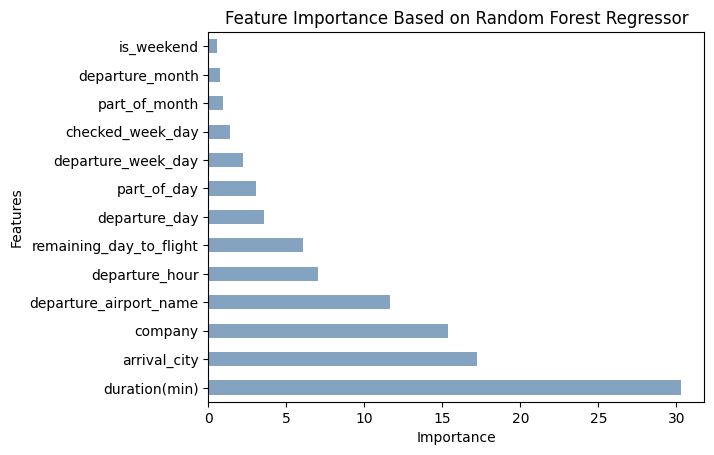

In [58]:
feature_scores.nlargest(100).plot(kind='barh', color=(0.2, 0.4, 0.6, 0.6))
plt.title("Feature Importance Based on Random Forest Regressor")
plt.xlabel("Importance")
plt.ylabel("Features")

In [7]:
dummies_data = pd.get_dummies(df[categorical_cols])
df_updated = pd.concat([df.drop(categorical_cols, axis=1), dummies_data], axis=1)

In [9]:
df_updated.columns

Index(['price_try', 'departure_day', 'departure_month',
       'remaining_day_to_flight', 'departure_hour', 'duration(min)',
       'company_AnadoluJet', 'company_Pegasus', 'company_Türk Hava Yolları',
       'departure_week_day_Friday', 'departure_week_day_Monday',
       'departure_week_day_Saturday', 'departure_week_day_Sunday',
       'departure_week_day_Thursday', 'departure_week_day_Tuesday',
       'departure_week_day_Wednesday', 'checked_week_day_Friday',
       'checked_week_day_Monday', 'checked_week_day_Saturday',
       'checked_week_day_Sunday', 'checked_week_day_Thursday',
       'checked_week_day_Tuesday', 'checked_week_day_Wednesday',
       'arrival_city_Adana', 'arrival_city_Ankara', 'arrival_city_Antalya',
       'arrival_city_Bodrum Milas', 'arrival_city_Dalaman',
       'arrival_city_Diyarbakir', 'arrival_city_Erzurum',
       'arrival_city_Gaziantep', 'arrival_city_Hatay', 'arrival_city_Izmir',
       'arrival_city_Kars', 'arrival_city_Mardin', 'arrival_city_Trabz

In [20]:
scaler = MinMaxScaler()
df_updated[["price"]] = scaler.fit_transform(df_updated[["price_try"]])
df_updated=df_updated.drop(["price_try"], axis=1)

In [21]:
df_updated.head()

,departure_day,departure_month,remaining_day_to_flight,departure_hour,duration(min),company_AnadoluJet,company_Pegasus,company_Türk Hava Yolları,departure_week_day_Friday,departure_week_day_Monday,...,part_of_day_Late Night,part_of_day_Morning,part_of_day_Night,part_of_day_Noon,is_weekend_Weekday,is_weekend_Weekend,part_of_month_Beginning,part_of_month_End,part_of_month_Middle,price
0,14,11,13,7,70,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0.019341
1,14,11,13,9,70,1,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0.019341
2,14,11,13,20,70,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0.019341
3,14,11,13,23,70,0,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0.027967
4,14,11,13,9,70,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0.028751


In [27]:
df_updated.shape[0]

129513

In [22]:
X = df_updated.drop(['price'], axis=1)

y = df_updated['price']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [26]:
reg_rf = RandomForestRegressor(n_estimators=100)
reg_rf.fit(X_train, y_train)
y_pred = reg_rf.predict(X_test)
reg_rf.score(X_test, y_test)


0.8719206550452552

In [28]:
feature_scores = pd.Series(reg_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

arrival_city_Antalya                            0.218999
company_Türk Hava Yolları                       0.136793
duration(min)                                   0.116138
remaining_day_to_flight                         0.114740
departure_hour                                  0.088635
departure_day                                   0.059739
departure_airport_name_Sabiha Gökçen Airport    0.027218
part_of_day_Morning                             0.026786
departure_week_day_Thursday                     0.021960
departure_week_day_Friday                       0.011505
departure_week_day_Saturday                     0.011214
part_of_month_Middle                            0.010880
part_of_day_Early Morning                       0.009471
part_of_day_Noon                                0.008842
departure_week_day_Wednesday                    0.008338
departure_week_day_Tuesday                      0.008181
departure_week_day_Sunday                       0.007606
company_AnadoluJet             